# Analyzing Android and Apple iOS Mobile Apps
---

Pretending to work as data analyst for a company that builds Android and Apple iOS mobile apps, where the apps are made available on Google Play and the App Store, the goal for this project is to analyze data to help developers understand what type of apps are likely to attract more users. Since the company only build apps that are free to download and install, and that are directed toward an English-speaking audience, the company's main source of revenue consists of in-app ads. This means the revenue for any given app is mostly influenced by the number of users who use the app — the more users that see and engage with the ads, the better.

**Goal of this project**:  
To help developers understand what type of apps are likely to attract more users on Google Play and App Store.


## About the Dataset Used in This Project
---
As of September 2018, there were approximately 2 million Apple iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

Collecting data for over four million apps requires a significant amount of time and money, so we'll try to analyze a sample of data instead. To avoid spending resources with collecting new data ourselves, we should first try to see whether we can find any relevant existing data at no cost. Luckily, these are two data sets that seem suitable for our purpose:

- A [dataset](https://www.kaggle.com/lava18/google-play-store-apps) containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018.

- A [dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) containing data about approximately 7,000 Apple iOS apps from the App Store; the data was collected in July 2017.

## Opening and Exploring the Data

In [1]:
import pandas as pd
import numpy as np

android_dataset = pd.read_csv('googleplaystore.csv')
apple_dataset = pd.read_csv('AppleStore.csv')

In [2]:
### Preview the first few rows of the Android apps dataset.

print("Android apps dataset, number of rows and columns:", android_dataset.shape)
android_dataset.head()


Android apps dataset, number of rows and columns: (10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
### A quick glance of the Android apps dataset info shows that there are some columns with null values, or missing data.

android_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
### Preview the first few rows of the Apple iOS apps dataset.

print("Apple iOS apps dataset, number of rows and columns:", apple_dataset.shape)
apple_dataset.head()


Apple iOS apps dataset, number of rows and columns: (7197, 16)


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [5]:
### A quick glance of the Apple iOS apps dataset info shows that there is no missing data on all columns.

apple_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(8), object(5)
memory usage: 899.8+ KB


## Cleaning the Android Apps Dataset - Correcting Erroneous Data

The Android apps dataset has a dedicated discussion section, and we can see that one of the discussions outlines an error for row 10472. Let's print this row and compare it against the header and another row that is correct.

The row 10472 corresponds to the app `Life Made WI-Fi Touchscreen Photo Frame`, and we can see that the rating is 19. This is clearly off because the maximum rating for a Google Play Store app is 5. 

For this row, it seems like the `Category` is blank and thus the values of subsequent columns are shifted to the left. A search on the Internet reveals that this app belongs to "LIFESTYLE" category.

We will correct this data by shifting the values to the correct columns, and update the `Category` and `Genres` columns to "LIFESTYLE" and "Lifestyle" respectively.

In [6]:
### Below shows the Android apps data row 10472 (that has incorrect data) and the subsequent 3 rows (that have correct data).

android_dataset[10472:10476]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [7]:
### Shifting the Android apps data to the correct columns on row 10472.

android_dataset.iloc[10472,1:] = android_dataset.iloc[10472,1:].shift(1)

### Updating the Category and Genres columns for the Android apps data row 10472.

android_dataset["Category"].iloc[10472] = "LIFESTYLE"
android_dataset["Genres"].iloc[10472] = "Lifestyle"

### Preview the data again after the column shift and Android apps data update on row 10472.

android_dataset[10472:10476]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19,3.0M,"1,000+",Free,0,Everyone,Lifestyle,"February 11, 2018",1.0.19,4.0 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [8]:
android_dataset["Category"].value_counts().sort_index()

ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               383
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
Name: Category, dtype: int64

## Cleaning the Android Apps Dataset - Numeric Values

Check that columns that are meant to contain numeric values do not contain strings.


In [9]:
### Verifying if the columns contain all numeric data.

Reviews = android_dataset["Reviews"].str.isnumeric().value_counts()
Rating = android_dataset["Rating"].str.isnumeric().value_counts()
Price = android_dataset["Price"].str.isnumeric().value_counts()
Size = android_dataset["Size"].str.isnumeric().value_counts()
Installs = android_dataset["Installs"].str.isnumeric().value_counts()

### Display the frequency tables in a more readable format.

pd.DataFrame(data = {'Reviews': Reviews, 
                     'Rating': Rating,
                     'Price': Price,
                     'Size': Size,
                     'Installs': Installs
                    }
            )

,Reviews,Rating,Price,Size,Installs
False,NaN,1.0,800,10841.0,10840
True,10840.0,NaN,10041,NaN,1


From the summary above, only the `Reviews` column contain 100% numeric values.

The other columns, i.e. `Rating`, `Price`, `Size`, `Installs` contain non-numeric values.

Let's first take a look at `Size`.

In [10]:
android_dataset["Size"].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
259k                     1
454k                     1
193k                     1
903k                     1
143k                     1
Name: Size, Length: 461, dtype: int64

In [11]:
### There are suffix characters "M" (Megabyte) and "k" (kilobyte) on the Size column.
### Replace these characters with the appropriate values.


android_dataset["Size"] = android_dataset["Size"].str.replace("k", "e+3")
android_dataset["Size"] = android_dataset["Size"].str.replace("M", "e+6")


### Replace the string "Varies with device" with null on the Size column.

android_dataset["Size"] = android_dataset["Size"].replace("Varies with device", np.nan)


### Convert the Size column datatype to numeric.

android_dataset["Size"] = pd.to_numeric(android_dataset["Size"])


In [12]:
### For the Price column, there is a $ sign for non-free apps.
### And on the Installs column, there is a + sign at the end.

android_dataset[android_dataset["Type"] != "Free"].head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000.0,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000.0,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000.0,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000.0,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4,18247,NaN,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


In [13]:
### Remove the $ sign on the Price column, and remove the + sign and comma on the Installs column.

android_dataset["Price"] = android_dataset["Price"].apply(lambda x: x.strip("$"))
android_dataset["Installs"] = android_dataset["Installs"].str.replace("+", "").str.replace(",", "")

### Convert the Price, Installs, Rating and Reviews columns' datatype to numeric.

android_dataset["Price"] = pd.to_numeric(android_dataset["Price"])
android_dataset["Installs"] = android_dataset["Installs"].astype(float)
android_dataset["Rating"] = pd.to_numeric(android_dataset["Rating"])
android_dataset["Reviews"] = pd.to_numeric(android_dataset["Reviews"])

android_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null float64
Size              9146 non-null float64
Installs          10841 non-null float64
Type              10840 non-null object
Price             10841 non-null float64
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [14]:
android_dataset.sample(100)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5308,AK Lodi Films,VIDEO_PLAYERS,4.9,23.0,2100000.0,100.0,Free,0.0,Everyone,Video Players & Editors,"August 11, 2015",1.1,4.0 and up
309,Truyện Vui Tý Quậy,COMICS,4.5,144.0,4700000.0,10000.0,Free,0.0,Everyone,Comics,"July 19, 2018",3.0,4.0.3 and up
9807,ES File Explorer & File Manager 2018,TOOLS,3.8,24.0,2900000.0,5000.0,Free,0.0,Everyone,Tools,"March 17, 2018",1.1,4.2 and up
223,sABN,BUSINESS,4.4,2287.0,1500000.0,1000000.0,Free,0.0,Everyone,Business,"March 26, 2018",4.9,2.2 and up
385,Viber Messenger,COMMUNICATION,4.3,11334973.0,NaN,500000000.0,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,"Topbuzz: Breaking News, Videos & Funny GIFs",NEWS_AND_MAGAZINES,4.7,175110.0,25000000.0,10000000.0,Free,0.0,Mature 17+,News & Magazines,"August 6, 2018",6.7.3,4.0 and up
1896,Galaxy Attack: Alien Shooter,GAME,4.6,506593.0,NaN,10000000.0,Free,0.0,Everyone,Arcade,"August 1, 2018",5.66,4.1 and up
6554,Skater Boy,GAME,4.3,1167143.0,12000000.0,100000000.0,Free,0.0,Everyone,Arcade,"September 20, 2017",1.18.35,4.1 and up
8485,e-Boks.dk,PRODUCTIVITY,3.2,6752.0,3300000.0,1000000.0,Free,0.0,Everyone,Productivity,"March 21, 2018",3.5.2,4.0.3 and up


## Cleaning the Android Apps Dataset - Removing Duplicates

Let's take a look at the number of unique App names from the Android apps dataset.

From the result below, we can see that there are 9660 unique Android app name, which means there are 10841 - 9660 = 1181 rows with duplicates in the dataset.


In [15]:
android_dataset["App"].value_counts()


ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
ESPN                                                 7
Duolingo: Learn Languages Free                       7
                                                    ..
Czech Public Transport IDOS                          1
2019 Tricks Es File Explores                         1
El Nueve                                             1
Advanced EX for FIAT                                 1
Toy Guitar with songs for kids                       1
Name: App, Length: 9660, dtype: int64

In [16]:
### These are some of the Android apps with duplicates.
### One of them is "Instagram".

android_dataset["App"].value_counts().head(36)


ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
ESPN                                                  7
Duolingo: Learn Languages Free                        7
8 Ball Pool                                           7
Nick                                                  6
Helix Jump                                            6
Temple Run 2                                          6
Bubble Shooter                                        6
Zombie Catchers                                       6
Subway Surfers                                        6
slither.io                                            6
Bowmasters                                            6
Bleacher Report: sports news, scores, & highlights    6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
theScore: Live Sports Scores, News, Stats & Videos    5
Angry Birds Classic                             

In [17]:
### Let's take a look at the Instagram app.
### From the data below, all the columns contain the same value, except the 'Reviews' columns.

android_dataset[android_dataset["App"] == "Instagram"]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


For apps with duplicate data, we would retain the record with the highest number of reviews.
The higher the number of reviews, the more recent the data should be, and the more reliable the ratings.

Take for example the Instagram app, we would retain row 2604 and remove the other rows (2545, 2611, 3909).


In [18]:
### Before dropping duplicates, sort the dataset by the app name and the number of reviews.

android_dataset.sort_values(by=['App', 'Reviews'], inplace=True)

### Drop duplicates by retaining the last record, where it's the record with the highest number of reviews.

android_dataset.drop_duplicates(['App'], keep='last', inplace=True)

print("Android apps dataset after dropping duplicates, number of rows and columns:", android_dataset.shape)


Android apps dataset after dropping duplicates, number of rows and columns: (9660, 13)


In [19]:
### Let's verify and take a look at the Instagram app again after dropping duplicates.

android_dataset[android_dataset["App"] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2604,Instagram,SOCIAL,4.5,66577446.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


## Cleaning the Android and Apple iOS Apps Dataset - Removing Non-English Apps

Since we're only interested in analyzing English apps, we'll remove data for non-English apps.

One way to go about this is to remove each app whose name contains a symbol that is not commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;, etc.), and other symbols (+, *, /, etc.).

All these characters that are specific to English texts are encoded using the ASCII standard. Each ASCII character has a corresponding number between 0 and 127 associated with it, and we can take advantage of that to build a function that checks an app name and tells us whether it contains non-ASCII characters.


In [20]:
### This is a user-defined function to check if the app name is in English.

def is_english(string):
    
    for character in string:
        
        ### Use the built-in function ord() to check if the character value is more than 127.
        ### English text is usually encoded using the ASCII standard and have ord between 0-127.
        
        if ord(character) > 127:
            return False
    
    return True


In [21]:
### Applying the function above and store the returned result (True/False) in a new column.

android_dataset["is_english"] = android_dataset["App"].apply(is_english)
apple_dataset["is_english"] = apple_dataset["track_name"].apply(is_english)


In [22]:
### Preview of the Android apps dataset that is returned as non-English apps using the function above.

android_dataset[android_dataset["is_english"] == False]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,is_english
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27.0,3600000.0,500.0,Free,0.00,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,False
10252,1. FC Köln App,SPORTS,4.6,2019.0,41000000.0,100000.0,Free,0.00,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up,False
1997,1LINE – One Line with One Touch,GAME,4.6,214878.0,10000000.0,10000000.0,Free,0.00,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,False
3448,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,115773.0,NaN,10000000.0,Free,0.00,Everyone,Personalization,"May 22, 2018",Varies with device,4.1 and up,False
6344,3D DJ – DJ Mixer 2018,FAMILY,4.3,6333.0,30000000.0,1000000.0,Free,0.00,Everyone,Entertainment,"May 25, 2018",1.1.12,5.0 and up,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414.0,59000000.0,100000.0,Free,0.00,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up,False
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,False
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098.0,18000000.0,1000000.0,Free,0.00,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up,False
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19.0,3200000.0,10000.0,Free,0.00,Everyone,Tools,"October 21, 2017",1.0,4.2 and up,False


In [23]:
### Preview of the Apple iOS apps dataset that is returned as non-English apps using the function above.

apple_dataset[apple_dataset["is_english"] == False]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,is_english
24,284815942,Google – Search made just for mobile,179979264,USD,0.00,479440,203,3.5,4.0,27.0,17+,Utilities,37,4,33,1,False
26,466965151,The Sims™ FreePlay,695603200,USD,0.00,446880,1832,4.5,4.0,5.29.0,12+,Games,38,5,12,1,False
31,543186831,8 Ball Pool™,86776832,USD,0.00,416736,19076,4.5,4.5,3.9.1,4+,Games,38,5,10,1,False
42,297368629,Lose It! – Weight Loss Program and Calorie Cou...,182054912,USD,0.00,373835,402,4.0,4.5,8.0.2,4+,Health & Fitness,37,3,1,1,False
46,366247306,▻Sudoku,71002112,USD,0.00,359832,17119,4.5,5.0,5.4,4+,Games,40,5,7,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7189,1070725569,【悲報】鬼ヶ島終了のお知らせ -ゾンビ桃太郎が3Dすぎて鬼やばいwww-,147131392,USD,0.00,0,0,0.0,0.0,1.0.1,12+,Games,40,4,1,1,False
7190,1069789014,中学英文法総復習 パターンで覚える 瞬間英文法,22881280,USD,1.99,0,0,0.0,0.0,1.0.6,4+,Education,37,0,31,1,False
7191,1069796800,Brain15 − 脳トレ 無料パズル −,8912896,USD,0.00,0,0,0.0,0.0,1.2,12+,Games,38,0,1,1,False
7193,1069830936,【謎解き】ヤミすぎ彼女からのメッセージ,16808960,USD,0.00,0,0,0.0,0.0,1.2,9+,Book,38,0,1,1,False


From the result above, we noticed that some English apps are incorrectly returned as non-English apps simply because they contain one or more symbol, punctuation marks, or Emoji.

Example of English apps that uses Emoji or other symbols:
- Docs To Go™ Free Office Suite
- Instachat 😜


In [24]:
### Let's check out the value of ord for the ™ symbol and the 😜 Emoji.

print('ord for " ™ " is :', ord('™'))
print('ord for "😜" is :', ord('😜'))


ord for " ™ " is : 8482
ord for "😜" is : 128540


To minimize the impact of data loss, we'll only remove an app if its name has more than three non-ASCII characters.



In [25]:
### Improve the user-defined function to check if the app name is in English.
### Only return False if there are more than 3 non-ASCII characters found.

def is_english_improved(string):
    
    non_ascii_count = 0
    
    for char in string:
        
        ### Use the built-in function ord() to check if the character value is more than 127.
        ### English texts usually encoded using the ASCII standard and have ord between 0-127.
        
        if ord(char) > 127:
            non_ascii_count += 1
            
    if non_ascii_count > 3:    
        return False
    else:
        return True
    

In [26]:
### Testing the improved function to check if the 2 app names below is in English.

print('App Name   : Docs To Go™ Free Office Suite')
print('-> English :', is_english_improved('Docs To Go™ Free Office Suite'))

print ('\n')

print('App Name   : Instachat 😜')
print('-> English :', is_english_improved('Instachat 😜'))


App Name   : Docs To Go™ Free Office Suite
-> English : True


App Name   : Instachat 😜
-> English : True


In [27]:
### Let's apply the is_english_improved() function and update the returned result (True/False) to the last column.

android_dataset["is_english"] = android_dataset["App"].apply(is_english_improved)
apple_dataset["is_english"] = apple_dataset["track_name"].apply(is_english_improved)


In [28]:
### Preview of the Android apps dataset that is returned as non-English apps using the improved function.

android_dataset[android_dataset["is_english"] == False]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,is_english
5266,AJ렌터카 법인 카셰어링,MAPS_AND_NAVIGATION,NaN,0.0,27000000.0,10.0,Free,0.00,Everyone,Maps & Navigation,"July 30, 2018",1.0.0.0,4.3 and up,False
5346,Al Quran Free - القرآن (Islam),BOOKS_AND_REFERENCE,4.7,1777.0,23000000.0,50000.0,Free,0.00,Everyone,Books & Reference,"February 15, 2015",1.1,2.2 and up,False
5841,Ay Yıldız Duvar Kağıtları,PERSONALIZATION,NaN,3.0,6500000.0,100.0,Free,0.00,Everyone,Personalization,"December 10, 2017",1.0.0,4.3 and up,False
9971,AÖF Ev İdaresi 1. Sınıf,FAMILY,NaN,2.0,11000000.0,1000.0,Free,0.00,Everyone,Education,"July 15, 2018",3.0,4.1 and up,False
6417,BL 女性向け恋愛ゲーム◆ごくメン,FAMILY,4.2,1901.0,8200000.0,100000.0,Free,0.00,Mature 17+,Simulation,"July 7, 2016",1.3.0,2.3.3 and up,False
6406,BL 女性向け恋愛ゲーム◆俺プリクロス,FAMILY,4.2,3379.0,62000000.0,100000.0,Free,0.00,Mature 17+,Simulation,"March 23, 2017",1.6.3,2.3.3 and up,False
6629,BQ-መጽሐፍ ቅዱሳዊ ጥያቄዎች,GAME,4.7,191.0,7200000.0,5000.0,Free,0.00,Everyone,Trivia,"July 31, 2018",4.1.2,4.1 and up,False
6729,BS Calendar / Patro / पात्रो,PRODUCTIVITY,4.2,218.0,NaN,50000.0,Free,0.00,Everyone,Productivity,"July 15, 2018",Varies with device,Varies with device,False
7396,Bonjour 2017 Abidjan CI ❤❤❤❤❤,FAMILY,NaN,235.0,3300000.0,10000.0,Free,0.00,Everyone,Entertainment,"February 16, 2017",1.0.2.0,2.0 and up,False
7463,CK 初一 十五,LIFESTYLE,4.0,294.0,153000.0,10000.0,Free,0.00,Everyone,Lifestyle,"July 3, 2013",1.0.12,2.1 and up,False


In [29]:
### Preview of the Apple iOS apps dataset that is returned as non-English apps using the improved function.

apple_dataset[apple_dataset["is_english"] == False]


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,is_english
813,445375097,爱奇艺PPS -《欢乐颂2》电视剧热播,224617472,USD,0.00,14844,0,4.0,0.0,6.3.3,17+,Entertainment,38,5,3,1,False
1193,405667771,"聚力视频HD-人民的名义,跨界歌王全网热播",90725376,USD,0.00,7446,8,4.0,4.5,5.0.8,12+,Entertainment,24,4,1,1,False
1427,336141475,优酷视频,204959744,USD,0.00,4885,0,3.5,0.0,6.7.0,12+,Entertainment,38,0,2,1,False
1518,425349261,网易新闻 - 精选好内容，算出你的兴趣,133134336,USD,0.00,4263,6,4.5,1.0,23.2,17+,News,37,4,2,1,False
1595,387682726,淘宝 - 随时随地，想淘就淘,309673984,USD,0.00,3801,6,4.0,4.0,6.7.2,4+,Shopping,37,1,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7189,1070725569,【悲報】鬼ヶ島終了のお知らせ -ゾンビ桃太郎が3Dすぎて鬼やばいwww-,147131392,USD,0.00,0,0,0.0,0.0,1.0.1,12+,Games,40,4,1,1,False
7190,1069789014,中学英文法総復習 パターンで覚える 瞬間英文法,22881280,USD,1.99,0,0,0.0,0.0,1.0.6,4+,Education,37,0,31,1,False
7191,1069796800,Brain15 − 脳トレ 無料パズル −,8912896,USD,0.00,0,0,0.0,0.0,1.2,12+,Games,38,0,1,1,False
7193,1069830936,【謎解き】ヤミすぎ彼女からのメッセージ,16808960,USD,0.00,0,0,0.0,0.0,1.2,9+,Book,38,0,1,1,False


Now that we have gotten a fairly accurate result above, let's filter our datasets to contain only English apps.

In [30]:
android_english = android_dataset[android_dataset["is_english"] == True].copy()
apple_english = apple_dataset[apple_dataset["is_english"] == True].copy()

print("Android apps (English), number of rows and columns:", android_english.shape)
print("Apple apps (English), number of rows and columns:", apple_english.shape)


Android apps (English), number of rows and columns: (9615, 14)
Apple apps (English), number of rows and columns: (6183, 17)


## Identifying English apps that are free

In [31]:
### For Android apps (English), there's a missing value for the Type column.

android_english["Type"].value_counts(dropna=False)


Free    8864
Paid     750
NaN        1
Name: Type, dtype: int64

In [32]:
### Let's view the record with this missing value.

android_english[android_english["Type"].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,is_english
9148,Command & Conquer: Rivals,FAMILY,NaN,0.0,NaN,0.0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,True


In [33]:
### Since the price is 0, let's update the Type to "Free" for this record. 

android_english.loc[android_english["Type"].isnull(), "Type"] = "Free"

android_english["Type"].value_counts(dropna=False)

Free    8865
Paid     750
Name: Type, dtype: int64

In [34]:
### The Android apps dataset already has a column called "Type" to classify free/paid apps.
### The Apple iOS apps dataset does not have this column, hence we will create it here.

apple_english["Type"] = apple_english["price"].apply(lambda p: "Free" if p==0 else "Paid")

#Below alternative codes can also be used.
#apple_english.loc[apple_english["price"] == 0, "Type"] = "Free"
#apple_english.loc[apple_english["price"] > 0, "Type"] = "Paid"

### Generate the absolute frequencies.

Apple_Apps = apple_english["Type"].value_counts()
Android_Apps = android_english["Type"].value_counts()

free_and_paid = pd.DataFrame(data = {'Apple Apps': Apple_Apps, 
                                     'Android Apps': Android_Apps
                    
                                    }
                            )

free_and_paid = free_and_paid.transpose()
print("Number of free and paid apps\n", free_and_paid)
print("\n")

### Generate the relative frequency (percentage).

Apple_Apps_pct = round(apple_english["Type"].value_counts(normalize = True) * 100, 2)
Android_Apps_pct = round(android_english["Type"].value_counts(normalize = True) * 100, 2)

free_and_paid_pct = pd.DataFrame(data = {'Apple Apps': Apple_Apps_pct, 
                                     'Android Apps': Android_Apps_pct
                    
                                    }
                            )

free_and_paid_pct = free_and_paid_pct.transpose()
print("Percentage of free and paid apps\n", free_and_paid_pct)


Number of free and paid apps
               Free  Paid
Apple Apps    3222  2961
Android Apps  8865   750


Percentage of free and paid apps
                Free   Paid
Apple Apps    52.11  47.89
Android Apps  92.20   7.80


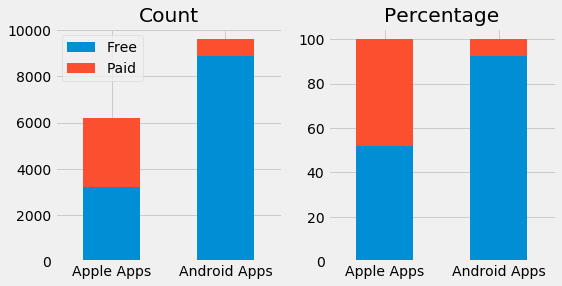

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#This code only generate 1 plot.
#free_and_paid.plot.bar(stacked=True, rot=0)

### Drawing 2 sub-plots

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

free_and_paid.plot(ax=axes[0],kind='bar', stacked=True, rot=0, title="Count")
free_and_paid_pct.plot(ax=axes[1], kind='bar', stacked=True, rot=0, legend=False, title="Percentage")
plt.show()


## Identifying Most Common Apps by Category / Genre

(Here we're referring to English apps that are free, and we're going to identify the top 10 common apps)


In [36]:
android_english_free = android_english[android_english["Type"] == "Free"].copy()
apple_english_free = apple_english[apple_english["Type"] == "Free"].copy()


In [37]:
### Top 10 Common Android Apps by Category.

android_english_free["Category"].value_counts().head(10)


FAMILY             1679
GAME                861
TOOLS               750
BUSINESS            407
LIFESTYLE           347
PRODUCTIVITY        345
FINANCE             328
MEDICAL             313
SPORTS              301
PERSONALIZATION     294
Name: Category, dtype: int64

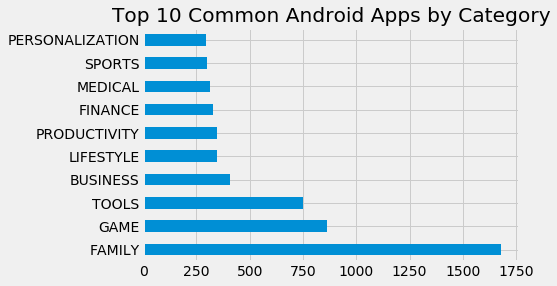

In [38]:
### Generate bar plot for the Top 10 Common Android Apps by Category.

plt.style.use('fivethirtyeight')
android_english_free["Category"].value_counts().head(10).plot.barh(title="Top 10 Common Android Apps by Category")
plt.show()


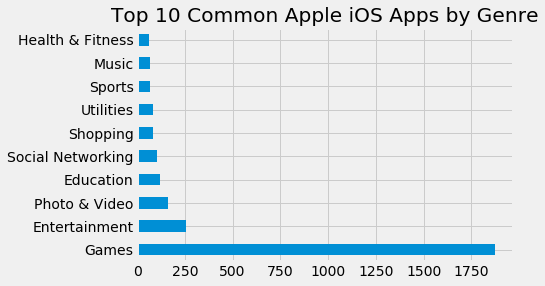

In [39]:
### Generate bar plot for the Top 10 Common Apple iOS Apps by Genre.

plt.style.use('fivethirtyeight')
apple_english_free["prime_genre"].value_counts().head(10).plot.barh(title="Top 10 Common Apple iOS Apps by Genre")
plt.show()


In [40]:
### Showing the Apple iOS most common apps by Genre, in relative frequencies (percentage).

apple_english_free["prime_genre"].value_counts(normalize=True) * 100


Games                58.162632
Entertainment         7.883302
Photo & Video         4.965860
Education             3.662322
Social Networking     3.289882
Shopping              2.607076
Utilities             2.513966
Sports                2.141527
Music                 2.048417
Health & Fitness      2.017381
Productivity          1.738051
Lifestyle             1.582868
News                  1.334575
Travel                1.241465
Finance               1.117318
Weather               0.869025
Food & Drink          0.806952
Reference             0.558659
Business              0.527623
Book                  0.434513
Medical               0.186220
Navigation            0.186220
Catalogs              0.124146
Name: prime_genre, dtype: float64

Among the free English apps, more than a half (58.16%) are games.
Entertainment apps are close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our data set.

The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.

## Most Popular Apps by Category on the Google Play Store

We have data about the number of installs for the Android apps market.

However, the install numbers don't seem precise enough — we can see from the earlier preview above that most values are open-ended (100+, 1,000+, 5,000+, etc.). 

We will just take the numbers (ignoring the + signs) and calculate the average number of installs for the Android apps for each Category.

In [41]:
### Top 10 Popular Android Apps by Category.

android_popular = android_english_free.groupby("Category")["Installs"].mean().sort_values(ascending=False).reset_index().head(10)
android_popular

#Similar code using pivot table
#android_english_free.pivot_table(index='Category', values = "Installs", aggfunc=np.mean).sort_values(ascending=False, by="Installs").reset_index().head(10)


,Category,Installs
0,COMMUNICATION,3.845612e+07
1,VIDEO_PLAYERS,2.472787e+07
2,SOCIAL,2.325365e+07
3,PHOTOGRAPHY,1.784011e+07
4,PRODUCTIVITY,1.678733e+07
5,GAME,1.559451e+07
6,TRAVEL_AND_LOCAL,1.398408e+07
7,ENTERTAINMENT,1.171976e+07
8,TOOLS,1.080139e+07
9,NEWS_AND_MAGAZINES,9.549178e+06


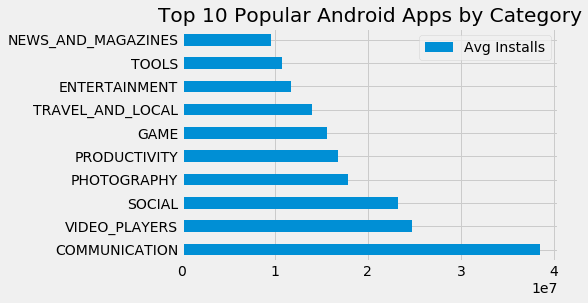

In [42]:
### Generate bar plot for the Top 10 Popular Android Apps by Category.

android_popular = android_english_free.groupby("Category")["Installs"].mean().sort_values(ascending=False).head(10)

plt.style.use('fivethirtyeight')
android_popular.plot.barh(title="Top 10 Popular Android Apps by Category", legend=True, label="Avg Installs")
plt.ylabel("")
plt.show()


In [43]:
### Top 10 Popular Android Apps by Category (to include the app size data).

android_popular = android_english_free.groupby("Category")["Installs", "Size"].mean()
android_popular = android_popular.sort_values("Installs", ascending=False).head(10)
android_popular


,Installs,Size
Category,,
COMMUNICATION,3.845612e+07,1.200912e+07
VIDEO_PLAYERS,2.472787e+07,1.561651e+07
SOCIAL,2.325365e+07,1.613652e+07
PHOTOGRAPHY,1.784011e+07,1.635277e+07
PRODUCTIVITY,1.678733e+07,1.292533e+07
GAME,1.559451e+07,4.251389e+07
TRAVEL_AND_LOCAL,1.398408e+07,2.311818e+07
ENTERTAINMENT,1.171976e+07,2.317455e+07
TOOLS,1.080139e+07,9.299466e+06


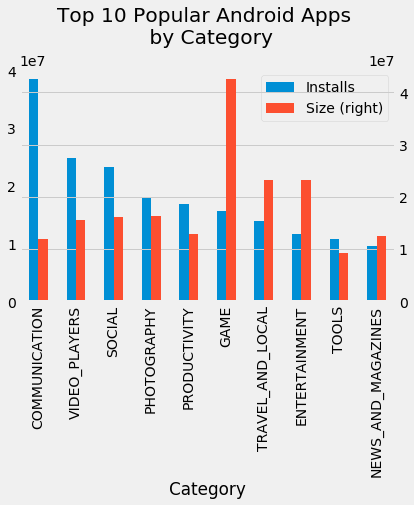

In [44]:
### Generate bar plot for the Top 10 Popular Android Apps by Category, showing the number of installs and the size of the apps.

plt.style.use('fivethirtyeight')

android_popular.plot.bar(secondary_y="Size")

plt.title("Top 10 Popular Android Apps \n by Category", y = 1.08) # y pads the title upward

plt.show()


## Most Popular Apps by Genre on the App Store

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Android apps dataset, we can find this information in the `Installs` column, which is what we've done above, but for the Apple iOS apps dataset this information is missing. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the `rating_count_tot` app.

Below, we calculate the average number of user ratings per app genre for the Apple iOS apps.


In [45]:
### Top 10 Popular Apple iOS Apps by Genre.

apple_english_free.groupby("prime_genre")["rating_count_tot"].mean().sort_values(ascending=False).head(10)


prime_genre
Navigation           86090.333333
Reference            74942.111111
Social Networking    71548.349057
Music                57326.530303
Weather              52279.892857
Book                 39758.500000
Food & Drink         33333.923077
Finance              31467.944444
Photo & Video        28441.543750
Travel               28243.800000
Name: rating_count_tot, dtype: float64

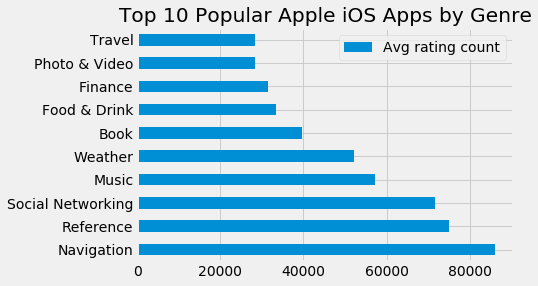

In [46]:
### Generate bar plot for the Top 10 Popular Apple iOS Apps by Genre.

apple_popular = apple_english_free.groupby("prime_genre")["rating_count_tot"].mean().sort_values(ascending=False).head(10)

plt.style.use('fivethirtyeight')
apple_popular.plot.barh(title="Top 10 Popular Apple iOS Apps by Genre", legend=True, label="Avg rating count")
plt.ylabel('') #to suppres the field name 'prime_genre' on the right.
plt.show()


Among the free English apps,

- For Andriod, seems like the most popular apps are from the category of Communication, Video Players, Social, Photography, Productivity, and Games only come after all these categories.

- For Apple iOS, the most popular apps are of Navigation, Reference, Social Networking, Music and Weather.

It looks like functional apps are more popular than games and entertainment apps.


